## OpenCV

In [1]:
import cv2

In [2]:
#version checking
cv2.__version__


'4.1.2'

#### Image Preprocessing

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import urllib
from urllib.request import urlopen

In [22]:
# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
	# return the image
	return image

In [23]:
#load image
image = url_to_image('https://upload.wikimedia.org/wikipedia/commons/f/fc/Tarom.b737-700.yr-bgg.arp.jpg')

In [24]:
type(image)

numpy.ndarray

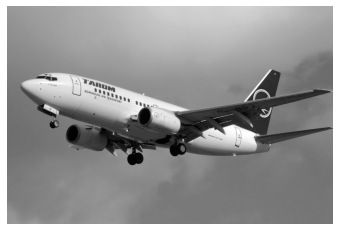

In [25]:
#showing the image
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

In [32]:
#image dimension as width x height
image.shape

(1349, 2022)

In [33]:
#checking the pixel
image[0,0]

151

In [34]:
image[0,5]

151

In [35]:
image[0]

array([151, 151, 151, ..., 168, 168, 167], dtype=uint8)

In [36]:
image[0].min()

151

In [37]:
image[0].max()

213

In [38]:
#Each element contain a color code, where standard is minimum is 0 and maximum 255

In [39]:
# opencv2 use color BGR = Blue Green Red
# others library like matplotlib use RGB = Red Green Blue

In [40]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)

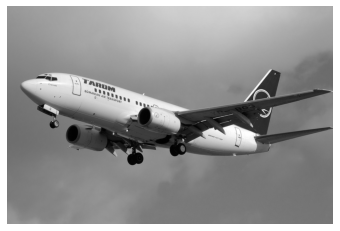

In [41]:
#image show
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [42]:
#creating a method for capturing a BGR color pic
# METHOD #2: OpenCV, NumPy, and urllib
def url_to_image_color(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image

In [43]:
color_image = url_to_image_color('https://static.scientificamerican.com/sciam/cache/file/92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg')

In [44]:
color_image.shape

(2048, 3072, 3)

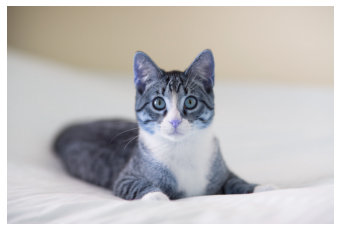

In [45]:
plt.imshow(color_image)
plt.axis('off')
plt.show()

In [46]:
#so normally Matplotlib can't read image with BGR color code
color_image_rgb = cv2.cvtColor(color_image,cv2.COLOR_BGR2RGB)

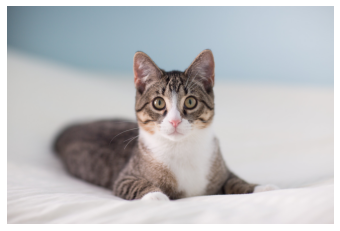

In [47]:
plt.imshow(color_image_rgb)
plt.axis('off')
plt.show()

#### Saving the preprocess Image

In [50]:
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/cat.jpg',color_image_rgb)

True

#### Resize Image

In [51]:
image_2 = url_to_image('https://static.toiimg.com/photo/msid-67586673/67586673.jpg?3918697')

In [52]:
image_2.shape

(2720, 4106)

In [53]:
#le'ts resize the image to 20x20

In [54]:
image_20x20 = cv2.resize(image_2,(20,20))

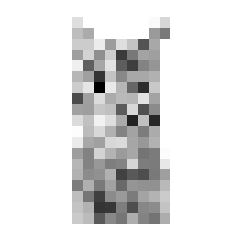

In [56]:
#view image
plt.imshow(image_20x20, cmap='gray')
plt.axis('off')
plt.show()

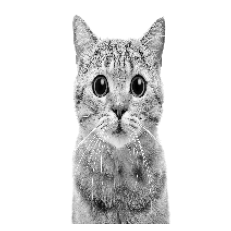

In [57]:
#let's resize the image to 200x200
image_200x200 = cv2.resize(image_2,(200,200))
plt.imshow(image_200x200,cmap='gray')
plt.axis('off')
plt.show()

#### Crop Image

In [58]:
image_3 = url_to_image('https://ichef.bbci.co.uk/news/1024/cpsprodpb/68DF/production/_109474862_angrycat-index-getty3-3.jpg')

In [59]:
image.shape

(1349, 2022)

In [63]:
#image crop is like slicing
image_crop = image_3[:,:500]

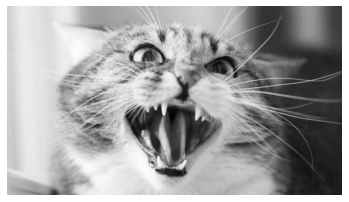

In [61]:
#original image
plt.imshow(image_3,cmap='gray')
plt.axis('off')
plt.show()

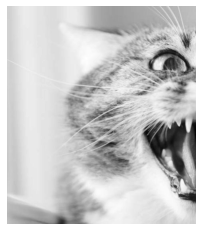

In [64]:
#crop image
plt.imshow(image_crop,cmap='gray')
plt.axis('off')
plt.show()

#### Image Blur

In [65]:
#we can make a image blur by lowering it's dimension
#cv2 has also it's own Blur Method

In [66]:
image_blur = cv2.blur(image_3,(5,5))

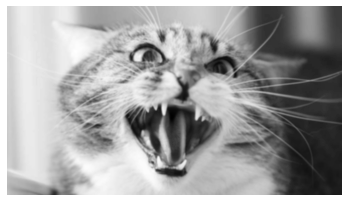

In [67]:
#img show
plt.imshow(image_blur,cmap='gray')
plt.axis('off')
plt.show()

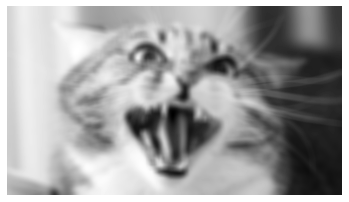

In [70]:
image_blur = cv2.blur(image_3,(20,20))
#img show
plt.imshow(image_blur,cmap='gray')
plt.axis('off')
plt.show()

In [86]:
#image Blur with kernal
kernal = np.ones((15,15))/105.0

In [87]:
kernal.shape

(15, 15)

In [88]:
image_kernal = cv2.filter2D(image_3,-1,kernal)

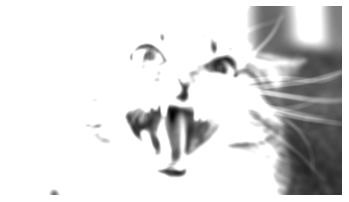

In [89]:
plt.imshow(image_kernal,cmap='gray')
plt.axis('off')
plt.show()

In [91]:
#kernal is a very good way to sharpening or edge detection any image

#### Image Sharpen

In [92]:
image_4 = url_to_image('https://i.ytimg.com/vi/uHKfrz65KSU/maxresdefault.jpg')

In [93]:
image_4.shape

(720, 1280)

In [94]:
#creating a kernal
kernal =  np.array([[0,-1,2],
                    [-1,5,1],
                    [0,-2,1]])

In [95]:
image_sharp = cv2.filter2D(image_4,-1,kernal)

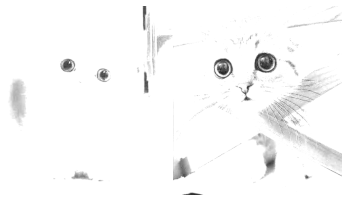

In [96]:
plt.imshow(image_sharp,cmap='gray')
plt.axis('off')
plt.show()

In [97]:
kernal2= np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]])

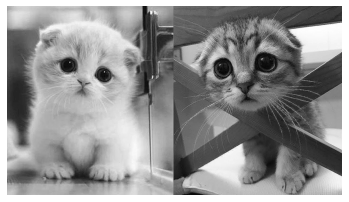

In [98]:
image_sharp = cv2.filter2D(image_4,-1,kernal2)
plt.imshow(image_sharp,cmap='gray')
plt.axis('off')
plt.show()

In [99]:
#to sharpening the edge normally we need to contrast the image

#### Contrast

In [100]:
image_one = url_to_image('https://static01.nyt.com/images/2018/09/01/science/01TB-CATS/merlin_142294395_c2acf4d4-3e4a-4e31-a497-690116229738-superJumbo.jpg')

In [101]:
image.shape

(1349, 2022)

In [102]:
## ENHANCE IMAGE 
image_enhance = cv2.equalizeHist(image_one)

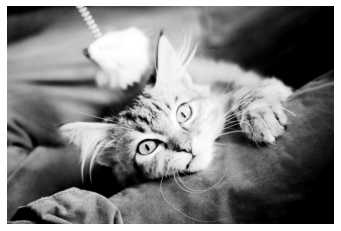

In [103]:
plt.imshow(image_enhance,cmap='gray')
plt.axis('off')
plt.show()

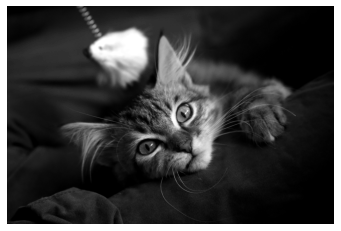

In [104]:
### Without enchance
plt.imshow(image_one,cmap='gray')
plt.axis('off')
plt.show()

In [105]:
### Working with color image to enhance
image_one_color = url_to_image_color('https://img.kyodonews.net/english/public/images/posts/999dc7ea8c73f32baa5361320e39c19a/photo_l.jpg')

In [106]:
#before that convert to YUV color format
image_yuv = cv2.cvtColor(image_one_color,cv2.COLOR_BGR2YUV)

In [107]:
#histogram equalization
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

In [108]:
#conver to RGB

In [109]:
image_one_rgb = cv2.cvtColor(image_one_color, cv2.COLOR_BGR2RGB)
image_yuv_rgb = cv2.cvtColor(image_yuv,cv2.COLOR_YUV2RGB)

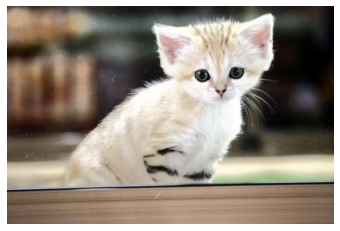

In [110]:
#yuv image 
plt.imshow(image_yuv_rgb)
plt.axis('off')
plt.show()

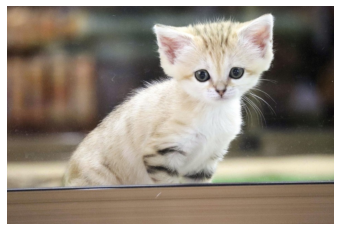

In [112]:
#normal image
plt.imshow(image_one_rgb)
plt.axis('off')
plt.show()

#### Isolating some colors

In [129]:
image_two_bgr = url_to_image_color('https://image.freepik.com/free-photo/cat-is-lying-table-while-beautiful-young-veterinarian_85574-7696.jpg')

In [130]:
#convert image bgr to HSV

In [131]:
image_hsv = cv2.cvtColor(image_two_bgr,cv2.COLOR_BGR2HSV)

In [132]:
# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

In [133]:
#mask
mask = cv2.inRange(image_hsv,lower_blue,upper_blue)

In [134]:
#mask image
image_mask = cv2.bitwise_and(image_two_bgr,image_two_bgr,mask=mask)

In [135]:
#convert bgr to rgb
image_mask_rgb = cv2.cvtColor(image_mask, cv2.COLOR_BGR2RGB)

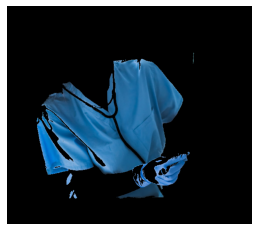

In [136]:
plt.imshow(image_mask_rgb)
plt.axis('off')
plt.show()

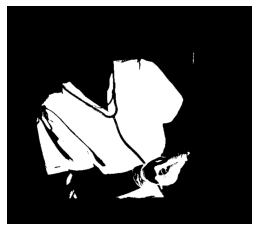

In [138]:
plt.imshow(mask,cmap='gray')
plt.axis('off')
plt.show()

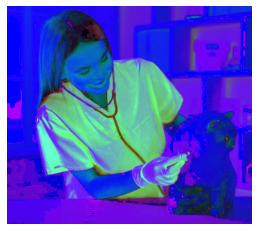

In [148]:

plt.imshow(image_hsv)
plt.axis('off')
plt.show()

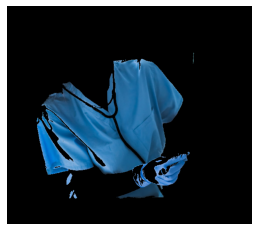

In [146]:
image_mask_2 = cv2.cvtColor(image_mask,cv2.COLOR_BGR2RGB)
plt.imshow(image_mask_2)
plt.axis('off')
plt.show()

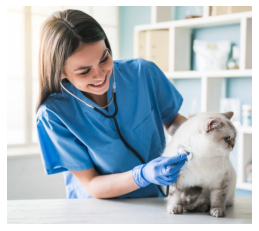

In [145]:
image_two_rgb = cv2.cvtColor(image_two_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(image_two_rgb)
plt.axis('off')
plt.show()

#### Making Image Binary

In [170]:
image_b = url_to_image('https://pbs.twimg.com/profile_images/1089487574492680192/gjaa3FKV_400x400.jpg')

In [172]:
image_b.shape


(400, 400)

In [154]:
#Creating a threshold to create a black and white image

In [155]:
max_output_value = 255
neighbor_size = 99
subtract_from_mean = 10
image_binary = cv2.adaptiveThreshold(image_b,max_output_value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY,neighbor_size,subtract_from_mean)

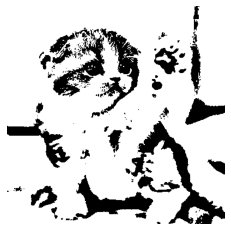

In [156]:
plt.imshow(image_binary,cmap='gray')
plt.axis('off')
plt.show()

#### Remove Background

In [182]:
image_back = url_to_image_color('https://besthqwallpapers.com/Uploads/29-12-2017/35602/thumb2-ragdoll-cat-4k-kitten-fluffy-cat-cute-ragdoll.jpg')

In [183]:
image_back.shape

(444, 710, 3)

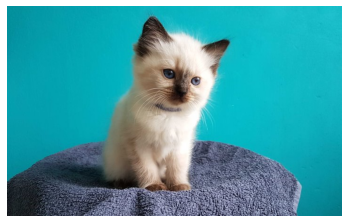

In [185]:
image_back_rgb = cv2.cvtColor(image_back,cv2.COLOR_BGR2RGB)
plt.imshow(image_back_rgb)
plt.axis('off')
plt.show()

In [197]:
## rectangle
rectangle = (0,56,444,710)

In [198]:
#mask
mask = np.zeros(image_back_rgb.shape[:2],np.uint8)

In [199]:
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

In [200]:
cv2.grabCut(image_back_rgb,mask, rectangle, bgdModel, fgdModel,5,cv2.GC_INIT_WITH_RECT) 

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0]], dtype=uint8),
 array([[4.62735368e-02, 4.60375893e-01, 7.54104443e-02, 2.23964614e-01,
         1.93975512e-01, 9.08658231e+01, 1.76413681e+02, 1.90954147e+02,
         1.50701522e+01, 1.86044036e+02, 1.97851611e+02, 5.69680966e+01,
         6.05930966e+01, 7.79689422e+01, 7.48572464e+00, 1.59179121e+02,
         1.72935237e+02, 1.08200747e+02, 1.14406874e+02, 1.42763240e+02,
         3.09544040e+03, 2.05405419e+02, 5.07365684e+02, 2.05405419e+02,
         6.73624158e+02, 6.19313882e+02, 5.07365684e+02, 6.19313882e+02,
         6.51985620e+02, 4.58835982e+01, 3.80442343e+00, 3.92245192e+00,
         3.80442343e+00, 1.34122248e+01, 1.28739365e+01, 3.92245192e+00,
         1.28739365e+01, 1.41241281e+01, 1.14374414e+03, 1.08944912e+03,
         9.78588954e+02, 1.08944912e+03, 1.1

In [201]:
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

In [202]:
image_rgb_nobg = image_back_rgb * mask_2[:, :, np.newaxis]

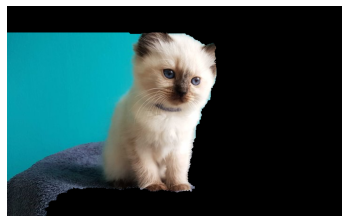

In [204]:
plt.imshow(image_rgb_nobg)
plt.axis('off')
plt.show()

In [205]:
#it takes checking to get the perfect background cut

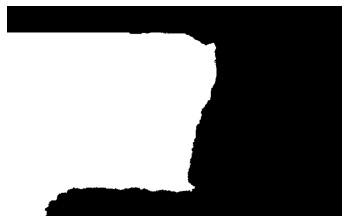

In [207]:
plt.imshow(mask_2,cmap='gray')
plt.axis('off')
plt.show()